In [2]:
# Naive matrix multiplication algorithm
def matrix_multiply(A, B):
    n = len(A)
    C = [[0] * n for _ in range(n)]  # Initialize an n x n result matrix
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [3]:
import time

def benchmark_naive_multiplication():
    sizes = range(10, 1001, 50)  # Increase the step size by 50 after each calculation
    times = []
    for n in sizes:
        # Create two random n x n matrices
        A = [[1 for _ in range(n)] for _ in range(n)]
        B = [[1 for _ in range(n)] for _ in range(n)]
        
        # Measure time taken for multiplication of def matrix multiply with the defined variables A and B
        start_time = time.time()
        matrix_multiply(A, B)
        end_time = time.time()
        
        times.append(end_time - start_time)
        print(f"Size {n} took {end_time - start_time:.5f} seconds") # prints the times of the calculations
    
    return sizes, times
sizes_naive, naive_times = benchmark_naive_multiplication()

Size 10 took 0.00016 seconds
Size 60 took 0.04415 seconds
Size 110 took 0.52159 seconds
Size 160 took 0.93284 seconds
Size 210 took 2.25286 seconds
Size 260 took 4.48992 seconds
Size 310 took 7.05941 seconds
Size 360 took 9.02282 seconds
Size 410 took 15.87587 seconds
Size 460 took 15.39930 seconds
Size 510 took 18.08167 seconds
Size 560 took 24.35931 seconds
Size 610 took 34.32786 seconds
Size 660 took 43.16842 seconds
Size 710 took 52.40176 seconds
Size 760 took 67.19115 seconds
Size 810 took 82.75826 seconds
Size 860 took 102.85485 seconds
Size 910 took 134.58096 seconds
Size 960 took 208.34118 seconds


In [5]:
import numpy as np
def benchmark_numpy_multiplication():
    sizes = range(10, 1001, 50)
    times = []
    for n in sizes:
        # Create two random n x n matrices using NumPy
        A = np.ones((n, n))
        B = np.ones((n, n))
        
        # Measure time taken for multiplication using NumPy
        start_time = time.time()
        np.dot(A, B)
        end_time = time.time()
        
        times.append(end_time - start_time)
        print(f"Size {n} with NumPy took {end_time - start_time:.5f} seconds")
    
    return sizes, times
sizes_numpy, numpy_times = benchmark_numpy_multiplication()

Size 10 with NumPy took 0.00035 seconds
Size 60 with NumPy took 0.00003 seconds
Size 110 with NumPy took 0.03511 seconds
Size 160 with NumPy took 0.00078 seconds
Size 210 with NumPy took 0.00094 seconds
Size 260 with NumPy took 0.00128 seconds
Size 310 with NumPy took 0.00172 seconds
Size 360 with NumPy took 0.00230 seconds
Size 410 with NumPy took 0.00557 seconds
Size 460 with NumPy took 0.00562 seconds
Size 510 with NumPy took 0.01739 seconds
Size 560 with NumPy took 0.00967 seconds
Size 610 with NumPy took 0.00796 seconds
Size 660 with NumPy took 0.01423 seconds
Size 710 with NumPy took 0.01225 seconds
Size 760 with NumPy took 0.01884 seconds
Size 810 with NumPy took 0.02307 seconds
Size 860 with NumPy took 0.02646 seconds
Size 910 with NumPy took 0.02788 seconds
Size 960 with NumPy took 0.04485 seconds


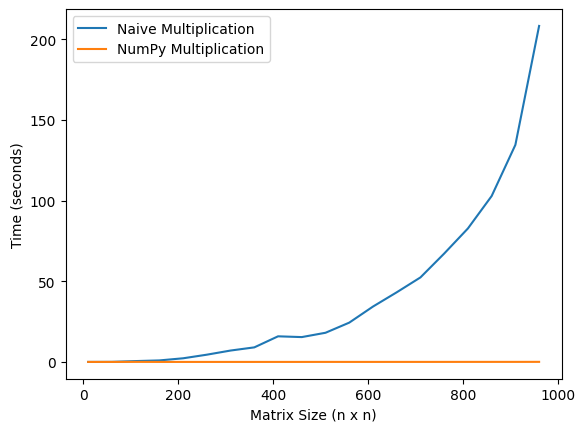

In [6]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes_naive, naive_times, label="Naive Multiplication")
plt.plot(sizes_numpy, numpy_times, label="NumPy Multiplication")
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

in the naive multiplication the triple nested loop structure is inefficient for large n ,as every possible pair of rows and columns is computed sequentially and therefore the code computes "slow". In comparison to the numpy implementation it is very optimized and works with different highly optimized C  libraries. With those libraries numpy is able to calculate simultaniously on different cpu cores at the same time and that reduces the time drastically.

In [8]:
# Helper functions for Strassen's algorithm
def add_matrix(A, B):
    n = len(A)
    return [[A[i][j] + B[i][j] for j in range(n)] for i in range(n)]

def subtract_matrix(A, B):
    n = len(A)
    return [[A[i][j] - B[i][j] for j in range(n)] for i in range(n)]

# Strassen's matrix multiplication implementation
def strassen_multiply(A, B):
    n = len(A)
    if n == 1:
        return [[A[0][0] * B[0][0]]]
    else:
        mid = n // 2
        # Divide matrices into quadrants
        A11 = [row[:mid] for row in A[:mid]]
        A12 = [row[mid:] for row in A[:mid]]
        A21 = [row[:mid] for row in A[mid:]]
        A22 = [row[mid:] for row in A[mid:]]
        
        B11 = [row[:mid] for row in B[:mid]]
        B12 = [row[mid:] for row in B[:mid]]
        B21 = [row[:mid] for row in B[mid:]]
        B22 = [row[mid:] for row in B[mid:]]
        
        # Calculate 7 products
        M1 = strassen_multiply(add_matrix(A11, A22), add_matrix(B11, B22))
        M2 = strassen_multiply(add_matrix(A21, A22), B11)
        M3 = strassen_multiply(A11, subtract_matrix(B12, B22))
        M4 = strassen_multiply(A22, subtract_matrix(B21, B11))
        M5 = strassen_multiply(add_matrix(A11, A12), B22)
        M6 = strassen_multiply(subtract_matrix(A21, A11), add_matrix(B11, B12))
        M7 = strassen_multiply(subtract_matrix(A12, A22), add_matrix(B21, B22))
        
        # Combine products into final matrix
        C11 = add_matrix(subtract_matrix(add_matrix(M1, M4), M5), M7)
        C12 = add_matrix(M3, M5)
        C21 = add_matrix(M2, M4)
        C22 = add_matrix(subtract_matrix(add_matrix(M1, M3), M2), M6)
        
        # Combine quadrants into single result
        C = [[0] * n for _ in range(n)]
        for i in range(mid):
            for j in range(mid):
                C[i][j] = C11[i][j]
                C[i][j + mid] = C12[i][j]
                C[i + mid][j] = C21[i][j]
                C[i + mid][j + mid] = C22[i][j]
        
        return C
# Benchmark Strassen's algorithm for matrix sizes
def benchmark_strassen_multiplication():
    sizes = [2**i for i in range(1, 10)]  # Limited to powers of 2 for Strassen's
    times = []
    for n in sizes:
        A = [[1 for _ in range(n)] for _ in range(n)]
        B = [[1 for _ in range(n)] for _ in range(n)]
        
        start_time = time.time()
        strassen_multiply(A, B)
        end_time = time.time()
        
        times.append(end_time - start_time)
        print(f"Size {n} with Strassen took {end_time - start_time:.5f} seconds")
    
    return sizes, times
sizes_strassen, strassen_times = benchmark_strassen_multiplication()

Size 2 with Strassen took 0.00005 seconds
Size 4 with Strassen took 0.05488 seconds
Size 8 with Strassen took 0.00440 seconds
Size 16 with Strassen took 0.08197 seconds
Size 32 with Strassen took 0.19424 seconds
Size 64 with Strassen took 0.77749 seconds
Size 128 with Strassen took 4.45323 seconds
Size 256 with Strassen took 32.04709 seconds
Size 512 with Strassen took 261.24491 seconds


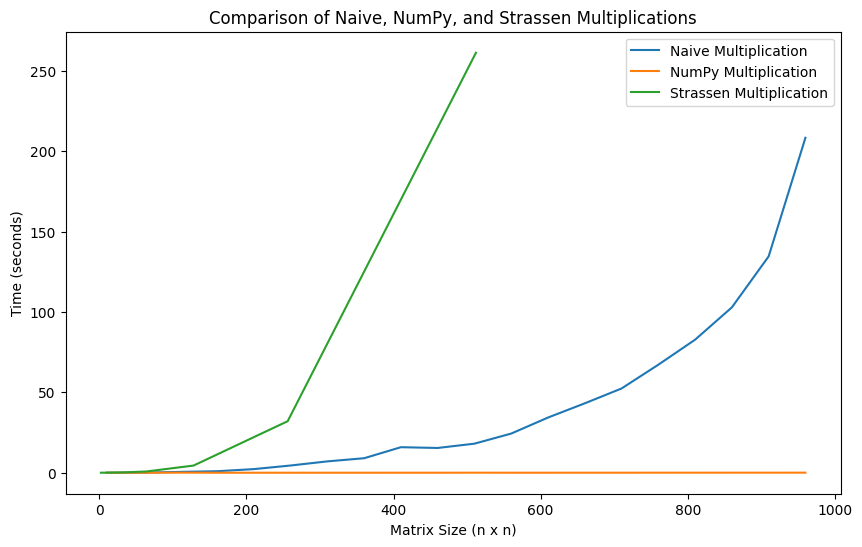

In [9]:
# Plot naive, NumPy, and Strassen multiplication results for comparison
plt.figure(figsize=(10, 6))
plt.plot(sizes_naive, naive_times, label="Naive Multiplication")
plt.plot(sizes_numpy, numpy_times, label="NumPy Multiplication")
plt.plot(sizes_strassen, strassen_times, label="Strassen Multiplication")
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time (seconds)")
plt.title("Comparison of Naive, NumPy, and Strassen Multiplications")
plt.legend()
plt.show()